# Auto_Insurance_Claims_EDA

http://thinkstats2.com

Using the modules thinkstats2, thinkplot from Think Stats book by 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as scstat
import matplotlib.pyplot as plt

import random

import thinkstats2
import thinkplot

import warnings
warnings.filterwarnings('ignore')

In [2]:
def read_data(filename):
    """ function reads the input csv file, parses the date columns to reformat the dates. Prints rows and column counts.
    returns the data frame"""
    
    df = pd.read_csv(filename, parse_dates=['policy_bind_date', 'incident_date'])
    nrows, ncols = df.shape

    print(f"There are total of {nrows} rows and {ncols} columns in the given dataset")
    return df

### Read the input dataset - insurance_claims.csv file

In [3]:
filename = 'insurance_claims.csv'

claims_df_tmp = read_data(filename)

claims_df_tmp = claims_df_tmp.dropna(subset=['age', 'policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_relationship', 'incident_state', 'total_claim_amount', 'auto_make', 'auto_model'])

There are total of 1000 rows and 39 columns in the given dataset


In [4]:
claims_df_tmp.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
5,256,39,104594,2006-12-10,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
6,137,34,413978,2000-04-06,IN,250/500,1000,1333.35,0,441716,...,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,429027,1990-03-02,IL,100/300,1000,1137.03,0,603195,...,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
8,27,33,485665,1997-05-02,IL,100/300,500,1442.99,0,601734,...,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N
9,212,42,636550,2011-07-25,IL,100/300,500,1315.68,0,600983,...,1,?,42300,4700,4700,32900,Saab,92x,1996,N


In [5]:
claims_df_tmp = claims_df_tmp.drop(['months_as_customer', 'policy_number', 'policy_bind_date', 'policy_csl', 'policy_deductable'], axis=1)

In [6]:
claims_df_tmp = claims_df_tmp.drop(['policy_annual_premium', 'umbrella_limit', 'insured_zip', 'witnesses', 'police_report_available'], axis=1)

In [7]:
claims_df_tmp = claims_df_tmp.drop(['fraud_reported', 'capital-gains', 'capital-loss', 'incident_date', 'collision_type', 'incident_type', 'bodily_injuries'], axis=1)

In [8]:
claims_df_tmp = claims_df_tmp.drop(['incident_severity', 'authorities_contacted', 'incident_city', 'incident_location', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'auto_year', 'property_damage'], axis=1)

In [9]:
claims_df_tmp.head(10)

,age,policy_state,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_state,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model
0,48,OH,MALE,MD,craft-repair,sleeping,husband,SC,71610,6510,13020,52080,Saab,92x
1,42,IN,MALE,MD,machine-op-inspct,reading,other-relative,VA,5070,780,780,3510,Mercedes,E400
2,29,OH,FEMALE,PhD,sales,board-games,own-child,NY,34650,7700,3850,23100,Dodge,RAM
3,41,IL,FEMALE,PhD,armed-forces,board-games,unmarried,OH,63400,6340,6340,50720,Chevrolet,Tahoe
4,44,IL,MALE,Associate,sales,board-games,unmarried,NY,6500,1300,650,4550,Accura,RSX
5,39,OH,FEMALE,PhD,tech-support,bungie-jumping,unmarried,SC,64100,6410,6410,51280,Saab,95
6,34,IN,MALE,PhD,prof-specialty,board-games,husband,NY,78650,21450,7150,50050,Nissan,Pathfinder
7,37,IL,MALE,Associate,tech-support,base-jumping,unmarried,VA,51590,9380,9380,32830,Audi,A5
8,33,IL,FEMALE,PhD,other-service,golf,own-child,WV,27700,2770,2770,22160,Toyota,Camry
9,42,IL,MALE,PhD,priv-house-serv,camping,wife,NC,42300,4700,4700,32900,Saab,92x


## A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book). Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1).

Variables selected for Analysis

1) age

2) policy_state / Insured’s home state

3) insured_sex

4) insured_education_level

5) insured_occupation

6) insured_relationship

7) incident_state

8) total_claim_amount

9) auto_make

10) auto_model


## Describe what the 5 variables mean in the dataset (Chapter 1).

Brief description of Variables selected for Analysis. Variable names are fairly self descriptive.

1) age : Age of the Insured

2) policy_state : Policy state / Insured’s home state

3) insured_sex : Insured’s gender

4) insured_education_level : Insured’s education

5) insured_occupation : Insured’s occupation

6) insured_relationship : Insured’s relation

7) incident_state : Accident incident’s state

8) total_claim_amount : Total claim amount for the accident incident

9) auto_make : Auto Make of the involved vehicle

10) auto_model : Auto Model of the involved vehicle


## Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2). 

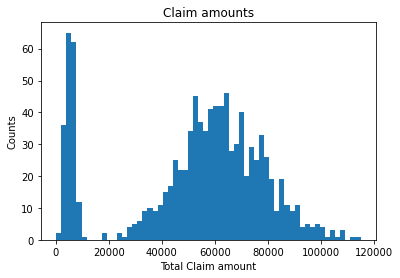

In [10]:
#Histogram for Total claim amount variable. 
#Using matplotlib.pyplot as plt in place of thinkstats2 / thinkplot modules, just for practice
plt.hist(claims_df_tmp['total_claim_amount'], bins=60)
plt.title('Claim amounts')
plt.ylabel("Counts")
plt.xlabel('Total Claim amount')
plt.show()

In [11]:
claim_count = claims_df_tmp[claims_df_tmp.total_claim_amount <= 20000]['total_claim_amount'].count()
print(f"Count of claims below $20,000 is : {claim_count}")

Count of claims below $20,000 is : 180


#### Looking at above histogram for total claim amounts, it is almost tempting thought to consider the claims with total amounts less than $20,000$ dollars as outliers and drop them and rest of the plot would look like close to Normal distribution. But looking at the total counts of claims below $20,000$ dollars it turns out to be 180, which is 18% of the total available data (1000 records). So, I am holding off on that thought for now.

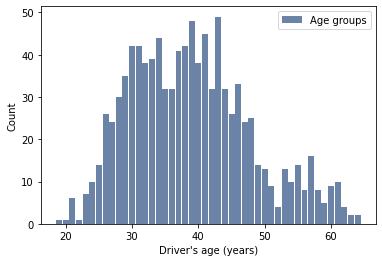

In [12]:
#Histogram for Age groups
hist = thinkstats2.Hist(claims_df_tmp.age, label='Age groups')
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Driver's age (years)", ylabel='Count')

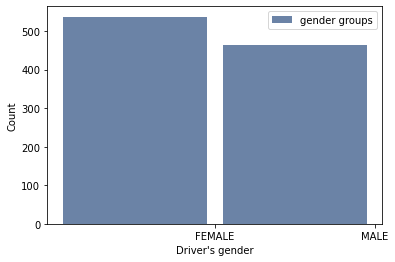

In [13]:
# Histogram by gender groups
hist = thinkstats2.Hist(claims_df_tmp.insured_sex, label='gender groups')
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Driver's gender", ylabel='Count')

Text(0.5, 0, 'Gender')

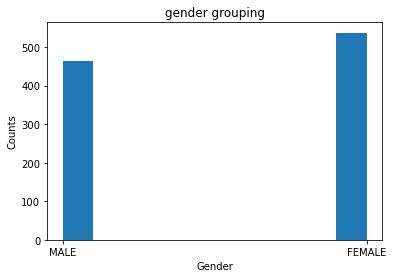

In [14]:
# Histogram by gender groups using pyplot
plt.hist(claims_df_tmp['insured_sex'])
plt.title('gender grouping')
plt.ylabel("Counts")
plt.xlabel('Gender')

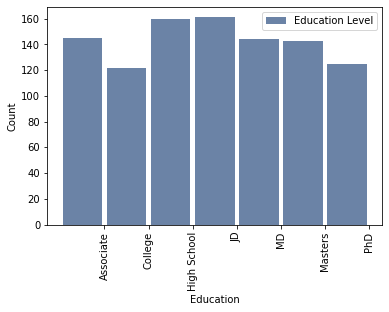

In [15]:
#Histogram for Education levels
hist = thinkstats2.Hist(claims_df_tmp.insured_education_level, label='Education Level')
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Education", ylabel='Count')
plt.xticks(rotation='vertical')
plt.show()

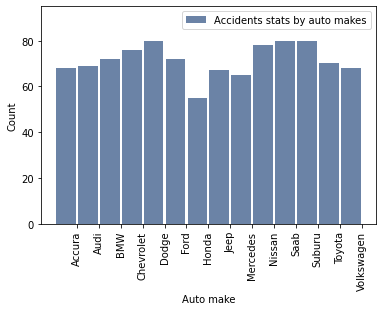

In [16]:
#Histogram by Auto makes
hist = thinkstats2.Hist(claims_df_tmp.auto_make, label='Accidents stats by auto makes')
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Auto make", ylabel='Count', ylim=[0, 95])
plt.xticks(rotation='vertical')
plt.show()

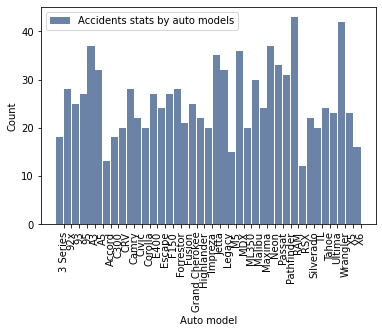

In [17]:
#Histogram by Auto models
hist = thinkstats2.Hist(claims_df_tmp.auto_model, label='Accidents stats by auto models')
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Auto model", ylabel='Count')
plt.xticks(rotation='vertical')
plt.show()

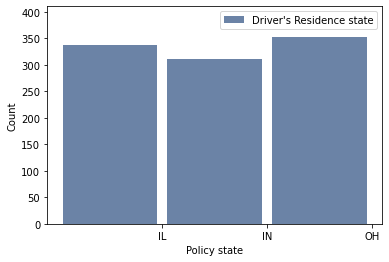

In [18]:
#Histogram by Policy states
hist = thinkstats2.Hist(claims_df_tmp.policy_state, label="Driver's Residence state")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Policy state", ylabel='Count', ylim=[0, 410])

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'NC'),
  Text(1.5, 0, 'NY'),
  Text(2.5, 0, 'OH'),
  Text(3.5, 0, 'PA'),
  Text(4.5, 0, 'SC'),
  Text(5.5, 0, 'VA'),
  Text(6.5, 0, 'WV')])

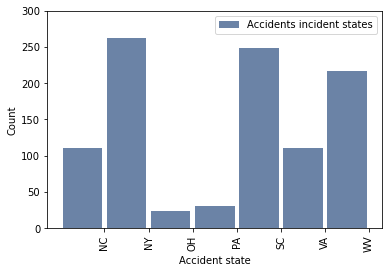

In [19]:
#Histogram by accident incident states
hist = thinkstats2.Hist(claims_df_tmp.incident_state, label='Accidents incident states')
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Accident state", ylabel='Count', ylim=[0, 300])
plt.xticks(rotation='vertical')

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'husband'),
  Text(1.5, 0, 'not-in-family'),
  Text(2.5, 0, 'other-relative'),
  Text(3.5, 0, 'own-child'),
  Text(4.5, 0, 'unmarried'),
  Text(5.5, 0, 'wife')])

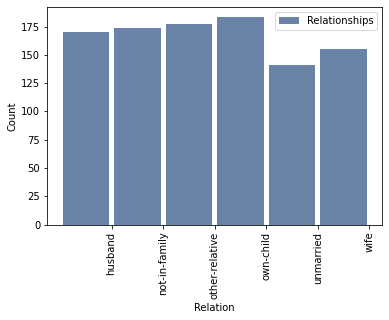

In [20]:
#Histogram by relationships
hist = thinkstats2.Hist(claims_df_tmp.insured_relationship, label='Relationships')
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Relation", ylabel='Count')
plt.xticks(rotation='vertical')

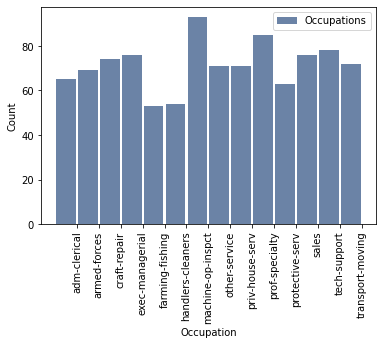

In [21]:
#Histogram by Occupation
hist = thinkstats2.Hist(claims_df_tmp.insured_occupation, label='Occupations')
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Occupation", ylabel='Count')
plt.xticks(rotation='vertical')
plt.show()

## Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).

### Age and total_claim_amount are the only 2 numeric variables I selected in the vehicle insurance claims analysis. Hence using describe() and mode() methods to display various properties of these variables. These provide respective total counts, mean, spreads like standard deviation, along with 1st quartiles (25%), medians (50%) and 3rd quartiles (75%) as well as min / max values.

In [22]:
claims_df_tmp[['age', 'total_claim_amount']].describe()

,age,total_claim_amount
count,1000.000000,1000.00000
mean,38.948000,52761.94000
std,9.140287,26401.53319
min,19.000000,100.00000
25%,32.000000,41812.50000
50%,38.000000,58055.00000
75%,44.000000,70592.50000
max,64.000000,114920.00000


In [23]:
print(f"mode value for age: {claims_df_tmp.age.mode()[0]} years")
print(f"mode value for total_claim_amount: $ {claims_df_tmp.total_claim_amount.mode()[0]}")

mode value for age: 43 years
mode value for total_claim_amount: $ 59400


**For all other selected categorical variables, Histograms and PMFs consist of corresponding values for each column variable. We won't be able to describe mean, mode, median, quartiles, minimum / maximum etc. since categorical variables are unordered**

In [24]:
total_claim_amount_lower = (41812.5 - (70592.5 - 41812.5) * 1.5)
total_claim_amount_upper = (70592.5 + (70592.5 - 41812.5) * 1.5)

print(f"Total claim amount column: lower end for skew identification is $ {total_claim_amount_lower} and upper end for skew identification is $ {total_claim_amount_upper}")

Total claim amount column: lower end for skew identification is $ -1357.5 and upper end for skew identification is $ 113762.5


### As we can see, lower end value turns out to be negative amount, which won't be valid for total claim amount. So, effectively all the claim amount records above 0 will need to be considered. For the upper end of range, we end up excluding records with total claim amount greater than $113,762.5

In [25]:
claims_df = claims_df_tmp[(claims_df_tmp.total_claim_amount >= total_claim_amount_lower) & (claims_df_tmp.total_claim_amount <= total_claim_amount_upper)]

In [26]:
claims_df.describe()

,age,total_claim_amount,injury_claim,property_claim,vehicle_claim
count,999.000000,999.000000,999.000000,999.000000,999.000000
mean,38.925926,52699.719720,7423.163163,7389.279279,37887.277277
std,9.118158,26341.301225,4872.602417,4816.150152,18849.657763
min,19.000000,100.000000,0.000000,0.000000,70.000000
25%,32.000000,41775.000000,4290.000000,4440.000000,30275.000000
50%,38.000000,57970.000000,6770.000000,6750.000000,42080.000000
75%,44.000000,70550.000000,11290.000000,10870.000000,50775.000000
max,64.000000,112320.000000,21450.000000,23670.000000,77760.000000


In [27]:
claims_df['hm_st_vs_acc_st'] = (claims_df.policy_state == claims_df.incident_state)

In [28]:
claims_df[claims_df.hm_st_vs_acc_st == 1].head(10)

,age,policy_state,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_state,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,hm_st_vs_acc_st
25,35,OH,MALE,Masters,sales,polo,own-child,OH,71500,16500,11000,44000,Ford,Escape,True
253,61,OH,MALE,PhD,transport-moving,movies,wife,OH,53640,5960,5960,41720,Nissan,Maxima,True
408,40,OH,MALE,Masters,exec-managerial,camping,unmarried,OH,43230,7860,7860,27510,Chevrolet,Silverado,True
494,47,OH,FEMALE,Associate,armed-forces,board-games,own-child,OH,64100,12820,6410,44870,Dodge,RAM,True
547,50,OH,MALE,MD,armed-forces,polo,unmarried,OH,69000,13800,6900,48300,Ford,F150,True
574,32,OH,MALE,JD,tech-support,chess,wife,OH,47400,9480,4740,33180,Chevrolet,Silverado,True
723,29,OH,MALE,Associate,prof-specialty,base-jumping,other-relative,OH,7110,790,1580,4740,Accura,MDX,True
869,27,OH,MALE,JD,farming-fishing,skydiving,husband,OH,40810,3710,7420,29680,Ford,F150,True
993,28,OH,MALE,MD,exec-managerial,camping,husband,OH,60200,6020,6020,48160,Volkswagen,Passat,True


In [29]:
same_state_count = claims_df[claims_df.hm_st_vs_acc_st == 1]['hm_st_vs_acc_st'].count()
total_row_count  = claims_df['hm_st_vs_acc_st'].count()

print(f"Number of drivers involved in accidents in the same state as policy holder's state, from dataset: {same_state_count}")
print(f"Total number of drivers involved in accidents in given dataset: {total_row_count}")

Number of drivers involved in accidents in the same state as policy holder's state, from dataset: 9
Total number of drivers involved in accidents in given dataset: 999


In [30]:
bool_cols = claims_df.columns[claims_df.dtypes == 'bool']

claims_df[bool_cols] = claims_df[bool_cols].replace({True: 'Yes', False: 'No'})

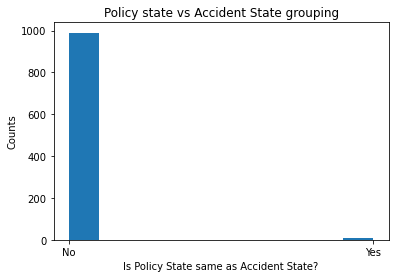

In [31]:
# Policy state vs Accident state Histogram
plt.hist(claims_df['hm_st_vs_acc_st'])
plt.xlabel('Is Policy State same as Accident State?')
plt.ylabel('Counts')
plt.title('Policy state vs Accident State grouping')
plt.show()

#### As we see only 9 records out of 1000 records have policy holder's state same as accident incident state.
#### This statistics helps confirm the analysis that policy holders driving outside the home state are more accident prone.

## Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3). – Done in notebook.

In [32]:
## custom built frequency calculation and PMF calculation functions for some of the categorical value variables like
## state code, gender, education, occupation, relationship, incident state, auto make and auto model.

## the reason for creation of these functions is because thinkstats PMF function wasn't supporting non numeric x-axis vars

def freq(values):
    freqs = {}
    for v in values:
        if v in freqs:
            freqs[v] += 1
        else:
            freqs[v] = 1
    print(f"frequency values are: {freqs}")
    return freqs

def prob(sample, freqs):
    probs = []
    for k,v in freqs.items():
        probs.append(round(v/len(sample),3))
    print(f"probability values are: {probs}")
    return probs

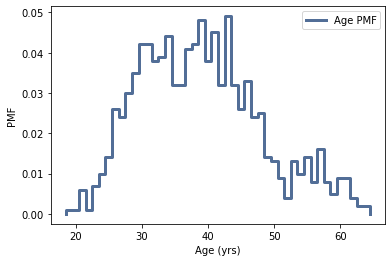

In [33]:
# Age group PMF
pmf_age = thinkstats2.Pmf(claims_df.age, label='Age PMF')
thinkplot.Pmf(pmf_age)
thinkplot.Config(xlabel='Age (yrs)', ylabel='PMF')

In [34]:
Age_OH_DF = claims_df[claims_df.policy_state == 'OH']
Age_IL_DF = claims_df[claims_df.policy_state == 'IL']
Age_IN_DF = claims_df[claims_df.policy_state == 'IN']

pmf_age_OH = thinkstats2.Pmf(Age_OH_DF.age, label='Age OH PMF')
pmf_age_IL = thinkstats2.Pmf(Age_IL_DF.age, label='Age IL PMF')
pmf_age_IN = thinkstats2.Pmf(Age_IN_DF.age, label='Age IN PMF')

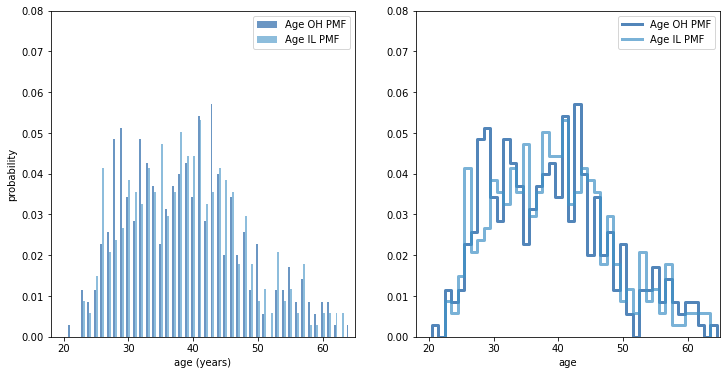

<Figure size 576x432 with 0 Axes>

In [35]:
# Comparing Ohio Age groups PMF with Illinois Age groups.
thinkplot.PrePlot(2, cols=2)

thinkplot.Hist(pmf_age_OH, align='right', width=0.3)
thinkplot.Hist(pmf_age_IL, align='left', width=0.3)

thinkplot.Config(xlabel='age (years)',
                ylabel='probability',
                axis=[18,65, 0, 0.08])

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([pmf_age_OH, pmf_age_IL])
thinkplot.Show(xlabel='age',
              axis=[18,65, 0, 0.08])

#### State of Ohio has more number of drivers in the age group of 26 years to 46 years compared to Illinois state drivers involved in accidents

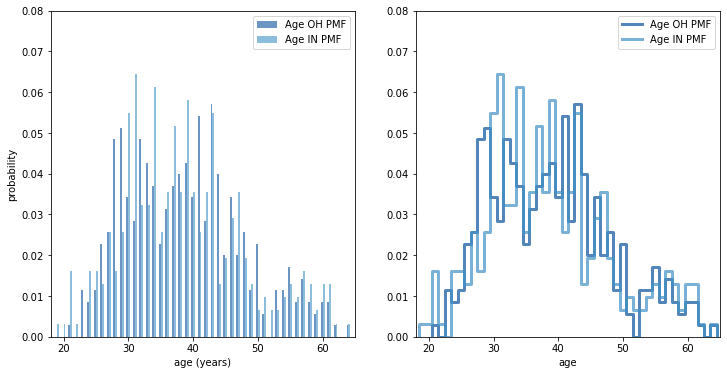

<Figure size 576x432 with 0 Axes>

In [36]:
# Comparing Ohio Age groups PMF with Indiana Age groups.
thinkplot.PrePlot(2, cols=2)

thinkplot.Hist(pmf_age_OH, align='right', width=0.3)
thinkplot.Hist(pmf_age_IN, align='left', width=0.3)

thinkplot.Config(xlabel='age (years)',
                ylabel='probability',
                axis=[18,65, 0, 0.08])

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([pmf_age_OH, pmf_age_IN])
thinkplot.Show(xlabel='age',
              axis=[18,65, 0, 0.08])

#### State of Indiana has more number of drivers in the age group of 28 years to 44 years compared to Ohio state drivers involved in accidents

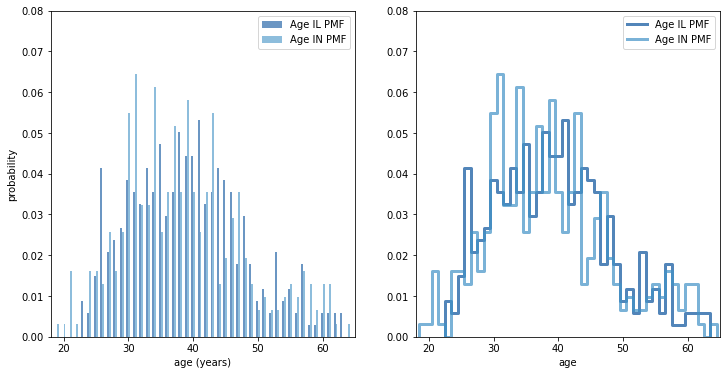

<Figure size 576x432 with 0 Axes>

In [37]:
# Comparing Illinois Age groups PMF with Indiana Age groups.
thinkplot.PrePlot(2, cols=2)

thinkplot.Hist(pmf_age_IL, align='right', width=0.3)
thinkplot.Hist(pmf_age_IN, align='left', width=0.3)

thinkplot.Config(xlabel='age (years)',
                ylabel='probability',
                axis=[18,65, 0, 0.08])

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([pmf_age_IL, pmf_age_IN])
thinkplot.Show(xlabel='age',
              axis=[18,65, 0, 0.08])

#### State of Indiana has more number of drivers in the age group of 29 years to 43 years compared to Illinois state drivers involved in accidents

### All of the below are just simple PMFs at individual variable levels. Just as add-ons

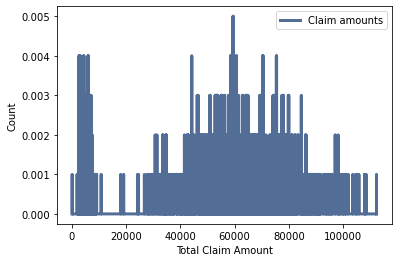

In [38]:
# Claims amounts PMF
hist = thinkstats2.Pmf(claims_df.total_claim_amount, label='Claim amounts')
thinkplot.Pmf(hist)
thinkplot.Config(xlabel="Total Claim Amount", ylabel='Count')

frequency values are: {'FEMALE': 536, 'MALE': 463}
probability values are: [0.537, 0.463]


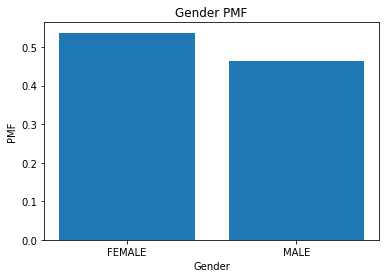

In [39]:
# Insured gender PMF
sample = sorted(claims_df.insured_sex)
freq_s = freq(sample)
prob_s = prob(sample, freq_s)
x_axis = sorted(list(set(sample)))
plt.bar(x_axis, prob_s)
plt.xlabel('Gender')
plt.ylabel('PMF')
plt.title('Gender PMF')
plt.show()

frequency values are: {'IL': 338, 'IN': 310, 'OH': 351}
probability values are: [0.338, 0.31, 0.351]


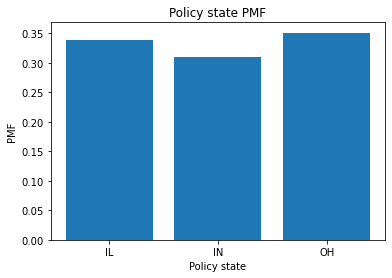

In [40]:
# Policy state PMF
sample = sorted(claims_df.policy_state)
freq_s = freq(sample)
prob_s = prob(sample, freq_s)
x_axis = sorted(list(set(sample)))
plt.bar(x_axis, prob_s)
plt.xlabel('Policy state')
plt.ylabel('PMF')
plt.title('Policy state PMF')
plt.show()

frequency values are: {'Associate': 145, 'College': 122, 'High School': 159, 'JD': 161, 'MD': 144, 'Masters': 143, 'PhD': 125}
probability values are: [0.145, 0.122, 0.159, 0.161, 0.144, 0.143, 0.125]


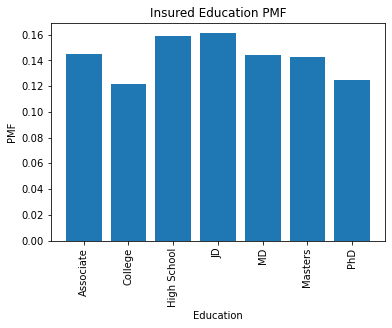

In [41]:
# Insured Education PMF
sample = sorted(claims_df.insured_education_level)
freq_s = freq(sample)
prob_s = prob(sample, freq_s)
x_axis = sorted(list(set(sample)))
plt.bar(x_axis, prob_s)
plt.xlabel('Education')
plt.ylabel('PMF')
plt.xticks(rotation='vertical')
plt.title('Insured Education PMF')
plt.show()

frequency values are: {'adm-clerical': 65, 'armed-forces': 69, 'craft-repair': 74, 'exec-managerial': 75, 'farming-fishing': 53, 'handlers-cleaners': 54, 'machine-op-inspct': 93, 'other-service': 71, 'priv-house-serv': 71, 'prof-specialty': 85, 'protective-serv': 63, 'sales': 76, 'tech-support': 78, 'transport-moving': 72}
probability values are: [0.065, 0.069, 0.074, 0.075, 0.053, 0.054, 0.093, 0.071, 0.071, 0.085, 0.063, 0.076, 0.078, 0.072]


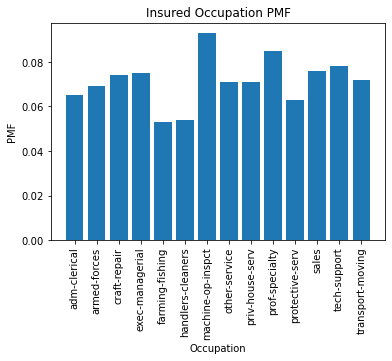

In [42]:
# Insured occupation PMF
sample = sorted(claims_df.insured_occupation)
freq_s = freq(sample)
prob_s = prob(sample, freq_s)
x_axis = sorted(list(set(sample)))
plt.bar(x_axis, prob_s)
plt.xlabel('Occupation')
plt.ylabel('PMF')
plt.xticks(rotation='vertical')
plt.title('Insured Occupation PMF')
plt.show()

frequency values are: {'husband': 170, 'not-in-family': 174, 'other-relative': 176, 'own-child': 183, 'unmarried': 141, 'wife': 155}
probability values are: [0.17, 0.174, 0.176, 0.183, 0.141, 0.155]


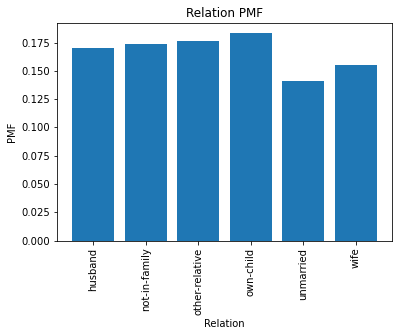

In [43]:
# Insured relationship PMF
sample = sorted(claims_df.insured_relationship)
freq_s = freq(sample)
prob_s = prob(sample, freq_s)
x_axis = sorted(list(set(sample)))
plt.bar(x_axis, prob_s)
plt.xlabel('Relation')
plt.ylabel('PMF')
plt.xticks(rotation='vertical')
plt.title('Relation PMF')
plt.show()

frequency values are: {'NC': 110, 'NY': 262, 'OH': 23, 'PA': 30, 'SC': 247, 'VA': 110, 'WV': 217}
probability values are: [0.11, 0.262, 0.023, 0.03, 0.247, 0.11, 0.217]


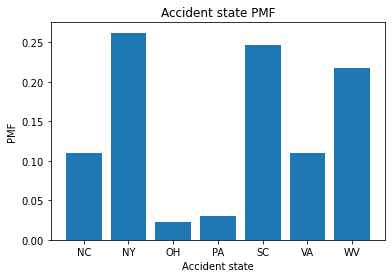

In [44]:
# Accident incident state PMF
sample = sorted(claims_df.incident_state)
freq_s = freq(sample)
prob_s = prob(sample, freq_s)
x_axis = sorted(list(set(sample)))
plt.bar(x_axis, prob_s)
plt.xlabel('Accident state')
plt.ylabel('PMF')
plt.title('Accident state PMF')
plt.show()

frequency values are: {'Accura': 68, 'Audi': 68, 'BMW': 72, 'Chevrolet': 76, 'Dodge': 80, 'Ford': 72, 'Honda': 55, 'Jeep': 67, 'Mercedes': 65, 'Nissan': 78, 'Saab': 80, 'Suburu': 80, 'Toyota': 70, 'Volkswagen': 68}
probability values are: [0.068, 0.068, 0.072, 0.076, 0.08, 0.072, 0.055, 0.067, 0.065, 0.078, 0.08, 0.08, 0.07, 0.068]


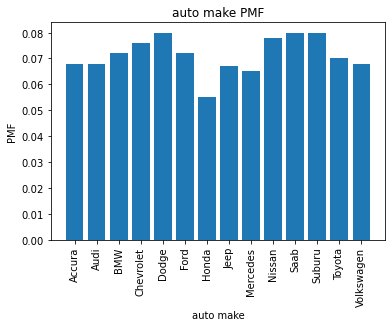

In [45]:
# Auto make PMF
sample = sorted(claims_df.auto_make)
freq_s = freq(sample)
prob_s = prob(sample, freq_s)
x_axis = sorted(list(set(sample)))
plt.bar(x_axis, prob_s)
plt.xlabel('auto make')
plt.ylabel('PMF')
plt.xticks(rotation = 'vertical')
plt.title('auto make PMF')
plt.show()

frequency values are: {'3 Series': 18, '92x': 28, '93': 25, '95': 27, 'A3': 36, 'A5': 32, 'Accord': 13, 'C300': 18, 'CRV': 20, 'Camry': 28, 'Civic': 22, 'Corolla': 20, 'E400': 27, 'Escape': 24, 'F150': 27, 'Forrestor': 28, 'Fusion': 21, 'Grand Cherokee': 25, 'Highlander': 22, 'Impreza': 20, 'Jetta': 35, 'Legacy': 32, 'M5': 15, 'MDX': 36, 'ML350': 20, 'Malibu': 30, 'Maxima': 24, 'Neon': 37, 'Passat': 33, 'Pathfinder': 31, 'RAM': 43, 'RSX': 12, 'Silverado': 22, 'TL': 20, 'Tahoe': 24, 'Ultima': 23, 'Wrangler': 42, 'X5': 23, 'X6': 16}
probability values are: [0.018, 0.028, 0.025, 0.027, 0.036, 0.032, 0.013, 0.018, 0.02, 0.028, 0.022, 0.02, 0.027, 0.024, 0.027, 0.028, 0.021, 0.025, 0.022, 0.02, 0.035, 0.032, 0.015, 0.036, 0.02, 0.03, 0.024, 0.037, 0.033, 0.031, 0.043, 0.012, 0.022, 0.02, 0.024, 0.023, 0.042, 0.023, 0.016]


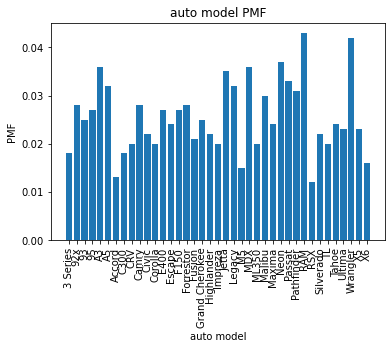

In [46]:
# Auto model PMF
sample = sorted(claims_df.auto_model)
freq_s = freq(sample)
prob_s = prob(sample, freq_s)
x_axis = sorted(list(set(sample)))
plt.bar(x_axis, prob_s)
plt.xlabel('auto model')
plt.ylabel('PMF')
plt.xticks(rotation = 'vertical')
plt.title('auto model PMF')
plt.show()

## Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

The 90% confidence interval for Drivers involved in accidents is (in years):  (26, 57)


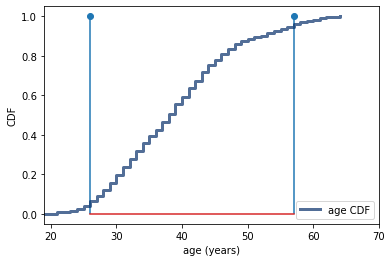

<Figure size 576x432 with 0 Axes>

In [47]:
# cdf creation for age based analysis and identifying 90% confidence interval

cdf = thinkstats2.Cdf(claims_df.age, label='age CDF')
pr = cdf.PercentileRank(claims_df.age.mean())

ci = (cdf.Percentile(5), cdf.Percentile(95))
print("The 90% confidence interval for Drivers involved in accidents is (in years): ", ci)
 
horizontal = [ci[0], ci[1]]
vertical = [1, 1]
plt.stem(horizontal, vertical, use_line_collection = "TRUE")

thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='age (years)', ylabel='CDF', xlim=[19, 70])

**Above CDF shows majority of the insured drivers involved in the accident fall in the 26 years to 57 years age (90%) confidence interval. So, it would be the risky group to be considered, while underwriting the policy and determining premium rates.**

## Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

mean of ages: 38.925925925925924 and stadard deviation of ages: 9.11815771517229


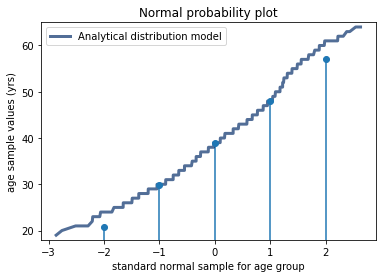

In [48]:
mu = claims_df.age.mean()
sig = claims_df.age.std()

print(f"mean of ages: {mu} and stadard deviation of ages: {sig}")

xs, ys = thinkstats2.NormalProbability(claims_df.age)
thinkplot.Plot(xs, ys, label='Analytical distribution model')

horizontal = [-2, -1, 0, 1, 2]
vertical = [((mu-2*sig)), (mu-sig), mu, (mu+sig), (mu+2*sig)]
plt.stem(horizontal, vertical, use_line_collection = "TRUE")

thinkplot.Config(title='Normal probability plot',
                 xlabel='standard normal sample for age group',
                 ylabel='age sample values (yrs)',
                 ylim = [18,65])

**The age group data for most accident prone drivers falls within 2 standard deviations of the mean of 38.948 years i.e. 20.67 years to 57.29 years**

## Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

In [49]:
claims_df['age2'] = claims_df.age**2
claims_df['age3'] = claims_df.age**3
claims_df['amt_root'] = claims_df.total_claim_amount**(1/2)
claims_df['amt_log'] = np.log10(claims_df.total_claim_amount)

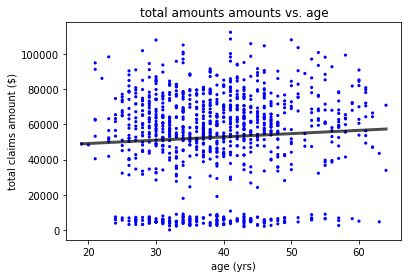

In [50]:
age, total_claim_amount = claims_df.age, claims_df.total_claim_amount

inter, slope = thinkstats2.LeastSquares(age, total_claim_amount)

thinkplot.Scatter(age, total_claim_amount, alpha=1.0, s=10)
xs, ys = thinkstats2.FitLine(age, inter, slope)
thinkplot.Plot(xs, ys, color='black')
thinkplot.Config(xlabel='age (yrs)', ylabel='total claims amount ($)', title='total amounts amounts vs. age')

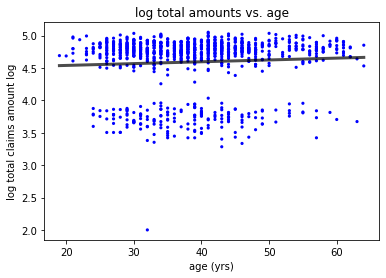

In [51]:
age, total_claim_amount = claims_df.age, claims_df.amt_log

inter, slope = thinkstats2.LeastSquares(age, total_claim_amount)

thinkplot.Scatter(age, total_claim_amount, alpha=1.0, s=10)
xs, ys = thinkstats2.FitLine(age, inter, slope)
thinkplot.Plot(xs, ys, color='black')
thinkplot.Config(xlabel='age (yrs)', ylabel='log total claims amount log', title='log total amounts vs. age')

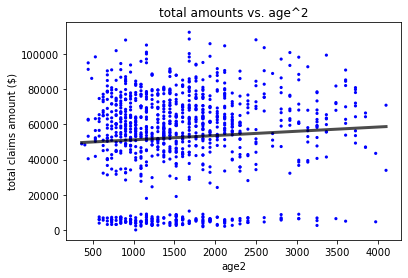

In [52]:
age, total_claim_amount = claims_df.age2, claims_df.total_claim_amount

inter, slope = thinkstats2.LeastSquares(age, total_claim_amount)

thinkplot.Scatter(age, total_claim_amount, alpha=1.0, s=10)
xs, ys = thinkstats2.FitLine(age, inter, slope)
thinkplot.Plot(xs, ys, color='black')
thinkplot.Config(xlabel='age2', ylabel='total claims amount ($)', title='total amounts vs. age^2')

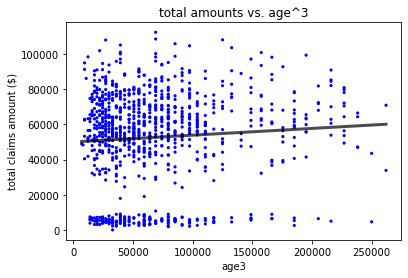

In [53]:
age, total_claim_amount = claims_df.age3, claims_df.total_claim_amount

inter, slope = thinkstats2.LeastSquares(age, total_claim_amount)

thinkplot.Scatter(age, total_claim_amount, alpha=1.0, s=10)
xs, ys = thinkstats2.FitLine(age, inter, slope)
thinkplot.Plot(xs, ys, color='black')
thinkplot.Config(xlabel='age3', ylabel='total claims amount ($)', title='total amounts vs. age^3')

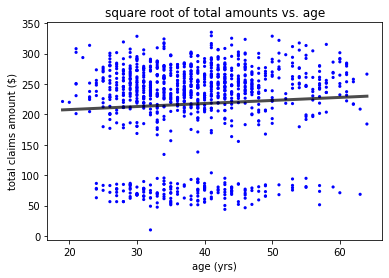

In [54]:
age, total_claim_amount = claims_df.age, claims_df.amt_root

inter, slope = thinkstats2.LeastSquares(age, total_claim_amount)

thinkplot.Scatter(age, total_claim_amount, alpha=1.0, s=10)
xs, ys = thinkstats2.FitLine(age, inter, slope)
thinkplot.Plot(xs, ys, color='black')
thinkplot.Config(xlabel='age (yrs)', ylabel='total claims amount ($)', title='square root of total amounts vs. age')

## correlation table and heatmap

In [55]:
claims_df.corr()

,age,total_claim_amount,injury_claim,property_claim,vehicle_claim,age2,age3,amt_root,amt_log
age,1.000000,0.064539,0.070810,0.056037,0.057567,0.990850,0.966306,0.061879,0.059161
total_claim_amount,0.064539,1.000000,0.804081,0.809751,0.982694,0.069655,0.072494,0.983545,0.931253
injury_claim,0.070810,0.804081,1.000000,0.561903,0.721591,0.070021,0.067422,0.779477,0.727527
property_claim,0.056037,0.809751,0.561903,1.000000,0.730825,0.058961,0.060252,0.783826,0.731422
vehicle_claim,0.057567,0.982694,0.721591,0.730825,1.000000,0.064174,0.068482,0.972684,0.926427
age2,0.990850,0.069655,0.070021,0.058961,0.064174,1.000000,0.992078,0.067391,0.064958
age3,0.966306,0.072494,0.067422,0.060252,0.068482,0.992078,1.000000,0.070657,0.068499
amt_root,0.061879,0.983545,0.779477,0.783826,0.972684,0.067391,0.070657,1.000000,0.979636
amt_log,0.059161,0.931253,0.727527,0.731422,0.926427,0.064958,0.068499,0.979636,1.000000


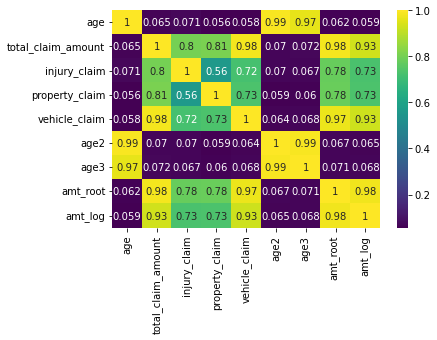

In [56]:
sns.heatmap(claims_df.corr(), annot=True, cmap="viridis");

## Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

### Testing correlation

To check whether an observed correlation is statistically significant, we can run a permutation test with a different test statistic.

In [57]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [58]:
def CorTest1(n):
    
    m = 1000
    
    claims_df_subset = claims_df.dropna(subset=['age', 'total_claim_amount'])
    
    data = claims_df.age.values[:n], claims_df.total_claim_amount.values[:n]
    
    ht = CorrelationPermute(data)
    pvalue = ht.PValue(m)
    
    return round(pvalue, 3)

In [59]:
print(f"p-value for driver's age vs total claim amount correlation for 999 records: ", CorTest1(999))

p-value for driver's age vs total claim amount correlation for 999 records:  0.046


**Looking at above pvalue, we can see the correlation between age and total claim amount is around 0.04 and hence it looks to be Statistically Significant**

In [60]:
def CorTest2(n):
    
    m = 1000
    
    claims_df_subset = claims_df.dropna(subset=['age', 'total_claim_amount'])
    
    data = claims_df.age2.values[:n], claims_df.total_claim_amount.values[:n]
    
    ht = CorrelationPermute(data)
    pvalue = ht.PValue(m)
    
    return round(pvalue, 3)

In [61]:
print(f"p-value for driver's age squared vs total claim amount correlation for 999 records: : ", CorTest2(999))

p-value for driver's age squared vs total claim amount correlation for 999 records: :  0.029


**Looking at above pvalue, we can see the correlation between age and total claim amount is around 0.02 / 0.03 i.e. less than 0.05 and hence it looks to be Statistically Significant**

## For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

In [62]:
import statsmodels.formula.api as smf

formula = 'total_claim_amount ~ age2 + hm_st_vs_acc_st + C(insured_sex) + C(insured_education_level) + C(insured_relationship) + C(insured_occupation) + C(auto_make) + C(auto_model)'
model_claims = smf.ols(formula, data=claims_df)
results_claims = model_claims.fit()
results_claims.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_claim_amount   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.023
Date:                Sat, 12 Feb 2022   Prob (F-statistic):              0.430
Time:                        23:21:10   Log-Likelihood:                -11551.
No. Observations:                 999   AIC:                         2.323e+04
Df Residuals:                     933   BIC:                         2.356e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                   3.713e+04   4339.476      8.555      0.000    2.86e+04    4.56e+04
hm_st_vs_acc_st[T.Yes]                     -1998.4624   9165.866     -0.218      0.827      -2e+04     1.6e+04
C(insured_sex)[T.MALE]                     -1821.9342   1718.298     -1.060      0.289   -5194.112    1550.243
C(insured_education_level)[T.College]       3263.5985   3406.330      0.958      0.338   -3421.357    9948.554
C(insured_education_level)[T.High School]   2516.9983   3156.326      0.797      0.425   -3677.323    8711.320
C(insured_education_level)[T.JD]            2935.0955   3123.043      0.940      0.348   -3193.907    9064.098
C(insured_education_level)[T.MD]            7399.6958   3199.988      2.312      0.021    1119.688    1.37e+04
C(insured_education_level)[T.Masters]       4935.2047   3186.613      1.549      0.122   -1318.556    1.12e+04
C(insured_education_level)[T.PhD]           5848.4122   3339.788      1.751      0.080    -705.954    1.24e+04
C(insured_relationship)[T.not-in-family]     214.5650   2948.086      0.073      0.942   -5571.083    6000.213
C(insured_relationship)[T.other-relative]    987.1785   2954.920      0.334      0.738   -4811.882    6786.239
C(insured_relationship)[T.own-child]       -1653.2627   2895.829     -0.571      0.568   -7336.356    4029.830
C(insured_relationship)[T.unmarried]        -585.0452   3104.239     -0.188      0.851   -6677.144    5507.054
C(insured_relationship)[T.wife]              646.5067   3021.566      0.214      0.831   -5283.347    6576.360
C(insured_occupation)[T.armed-forces]       6174.5813   4712.751      1.310      0.190   -3074.240    1.54e+04
C(insured_occupation)[T.craft-repair]       7520.5784   4632.561      1.623      0.105   -1570.867    1.66e+04
C(insured_occupation)[T.exec-managerial]    8805.0682   4592.306      1.917      0.055    -207.377    1.78e+04
C(insured_occupation)[T.farming-fishing]    3618.4562   5018.762      0.721      0.471   -6230.914    1.35e+04
C(insured_occupation)[T.handlers-cleaners]  1.539e+04   4982.352      3.088      0.002    5608.531    2.52e+04
C(insured_occupation)[T.machine-op-inspct]  8966.3257   4374.939      2.049      0.041     380.466    1.76e+04
C(insured_occupation)[T.other-service]      2959.1003   4665.246      0.634      0.526   -6196.491    1.21e+04
C(insured_occupation)[T.priv-house-serv]    5195.5364   4649.881      1.117      0.264   -3929.901    1.43e+04
C(insured_occupation)[T.prof-specialty]     7405.3328   4414.536      1.677      0.094   -1258.238    1.61e+04
C(insured_occupation)[T.protective-serv]    5597.3096   4750.186      1.178      0.239   -3724.976    1.49e+04
C(insured_occupation)[T.sales]              2653.7883   4566.475      0.581      0.561

#### Looking at above outcome from OLS method from statsmodel, we can notice that

#### Variables like age2 (age squared), auto make (e.g. Dodge, Ford) and auto model (e.g. E400, Escape) to an extent, insured occupation (e.g. transport moving, machine op inspector, handlers-cleaners) to some extent and insured education (e.g. MD, PhD etc) to some extent do have statistical significance in their respective relation with total claim amount field.

#### On the other hand, variables like home state vs. accident state, insured sex, insured relationship did not seem to show much statistical significance in their respective relation with total claim amount field.

#### Durbin Watson test statistics of 1.925 which is fairly close to 2 and shows that there is very little / no auto correlation between independent variables selected for the model.

#### Skew is -0.564 which indicates that data is negatively skewed i.e. longer tail in the data on the lower end of the distribution. This also points back to the observation from the Histogram for Total Claim Amount that the amounts less than 20,000 dollars were appearing as a skew

#### Kurtosis value of 2.617, which is greater than 1 indicates that the distribution is peaked i.e. pointy in shape